# **Project: Anomaly Detection for AITEX Dataset**
#### Track: VAE
## `Notebook 4`: AITEX Fabric Defect Database
**Author**: Oliver Grau 

**Date**: 27.03.2025  
**Version**: 1.0

## 📚 Table of Contents

- [1. What the Dataset Contains](#1-what-the-dataset-contains)
- [2. How Image Data is Represented](#2-how-image-data-is-represented)
- [3. Why This Dataset Is a Good Fit](#3-why-this-dataset-is-a-good-fit)
- [4. Why is there a distinct area on the left side of the image](#4-why-is-there-a-distinct-area-on-the-left-side-of-the-image)
- [5. Implications for the Anomaly Detection System](#5-implications-for-the-anomaly-detection-system)
- [6. Conclusion & Outlook](#6-conclusion--outlook)

---

To apply the concepts of anomaly detection using autoencoders, we will use a real-world, image-based dataset: the **AITEX Fabric Defect Database**.

Another advantage of using the AITEX Dataset is the fact that it more resembles a real industry used dataset instead of the many synthetic benchmark datasets like MVTEC, TILDA and so on. The AITEX dataset is realistic because it has imperfect labels, low quality images, only a few images (not thousands) and even some more challenges we will evaluate in later notebooks.

## 1. What the Dataset Contains:
- **High-resolution grayscale images** of fabric rolls
- **Three categories** of images:
  - `NODefect_images/`: clean fabric without any defects
  - `Defect_images/`: fabric with visible surface anomalies (e.g. holes, stains, or weaving issues)
  - `Mask_images/`: pixel-accurate binary masks indicating the defective regions (optional for training but useful for evaluation)

## 2. How Image Data is Represented
Image data is very different from tabular or time-series data. Here’s how:

- An image is stored as a 2D matrix (for grayscale) or a 3D matrix (for RGB)
  - Example: A grayscale image of size 256×256 is a matrix with shape `(256, 256)`
  - An RGB image has shape `(256, 256, 3)` where the last dimension corresponds to color channels (Red, Green, Blue)

- Each pixel is represented by an intensity value:
  - Grayscale: a value between 0 (black) and 255 (white)
  - RGB: three values for each channel, typically also in the range 0–255

Before feeding images into a neural network, we:
- Normalize pixel values (typically to range 0–1 or -1 to 1)
- Resize them to a consistent shape (e.g. 128×128 or 256×256)
- Convert them into **tensors**, the native data format for deep learning models

## 3. Why This Dataset Is a Good Fit
- Small and manageable (fits on a laptop)
- Simple structure: clear distinction between normal and defective cases
- Visually intuitive: SMEs can immediately understand what the model is trying to learn
- Perfect for training convolutional autoencoders to reconstruct normal images and detect anomalies based on reconstruction error

## 4. Why is there a distinct area on the left side of each image?

In the **AITEX Fabric Defect Dataset**, each image represents a relatively high-resolution scan or snapshot of a **fabric roll or section of a production line**. The **left edge of the image** (usually 100–200 pixels wide) consistently differs from the rest of the image due to:

### 🧩 Possible reasons for the visual difference:

1. **Border/Background of the Conveyor or Machine Frame**
   - Often, images are taken from automated systems or fabric inspection devices.
   - The **left area** might capture a **non-fabric region**, such as a metal frame, conveyor belt edge, or sensor calibration zone.

2. **Calibration / Synchronization Zone**
   - Industrial cameras often capture slightly wider areas than just the "region of interest" (ROI).
   - This edge might be used internally for **alignment**, **focus calibration**, or to **anchor fabric positioning** in automated analysis systems.

3. **Edge Effects / Non-relevant Area**
   - The very start of the fabric roll may contain defects or alignment shifts not meant for quality analysis.
   - Some manufacturers intentionally leave a margin or control strip at the start or edge of fabric rolls.

## 5. Implications for the anomaly detection system

If we're training an autoencoder (or any other anomaly detection model), this **non-fabric area should be excluded** to avoid misleading the model. Here's what we can do:

### ✅ Recommendation:
- **Crop the images** before training:
  - Example: Crop columns `150:` onward to remove the left margin
  - This ensures the model focuses only on the **actual fabric texture**, where defects can occur
- We can inspect a few images side by side (defect vs. non-defect) to pick an appropriate cutoff

---

In the next section, we’ll prepare and explore this dataset in code, perform some visual checks, and move toward building our anomaly detection model.

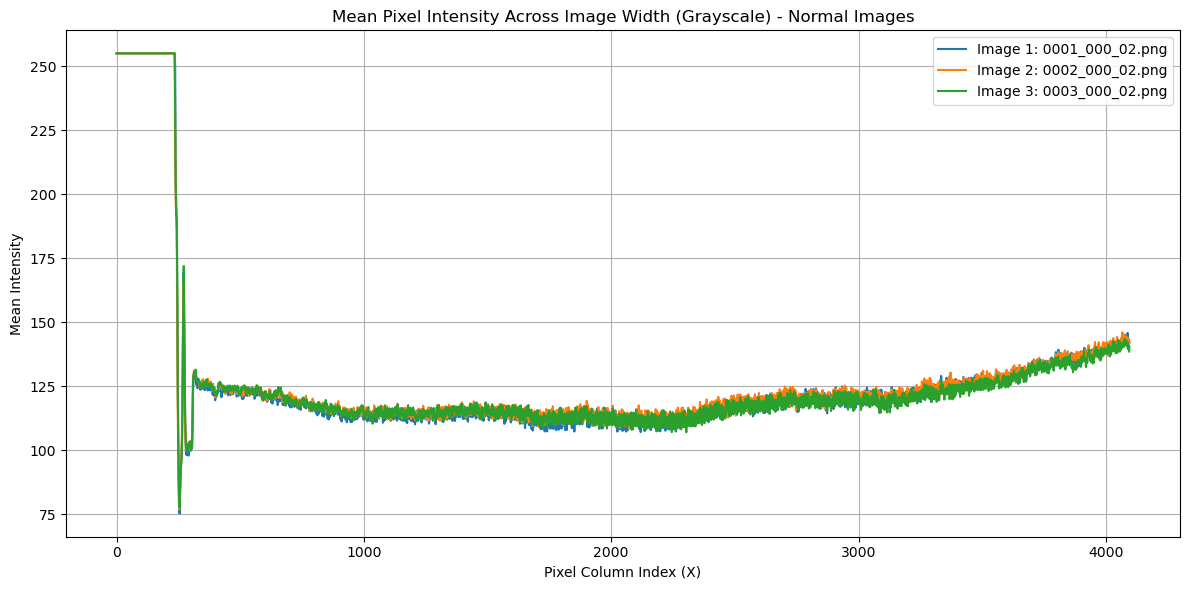

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Configuration
folder_path = "./data/NODefect_images/2306894-210033u"  # Adjust if needed
sample_files = sorted(os.listdir(folder_path))[:3]  # Pick first 3 normal images
image_paths = [os.path.join(folder_path, fname) for fname in sample_files]

# Plot setup
plt.figure(figsize=(12, 6))

for idx, img_path in enumerate(image_paths):
    # Load image as grayscale
    img = Image.open(img_path).convert("L")
    img_array = np.array(img)

    # Compute mean intensity per column (across height)
    column_means = img_array.mean(axis=0)

    # Plot
    plt.plot(column_means, label=f"Image {idx+1}: {os.path.basename(img_path)}")

plt.title("Mean Pixel Intensity Across Image Width (Grayscale) - Normal Images")
plt.xlabel("Pixel Column Index (X)")
plt.ylabel("Mean Intensity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

And here is the same visualization for the **defective images** from the dataset:

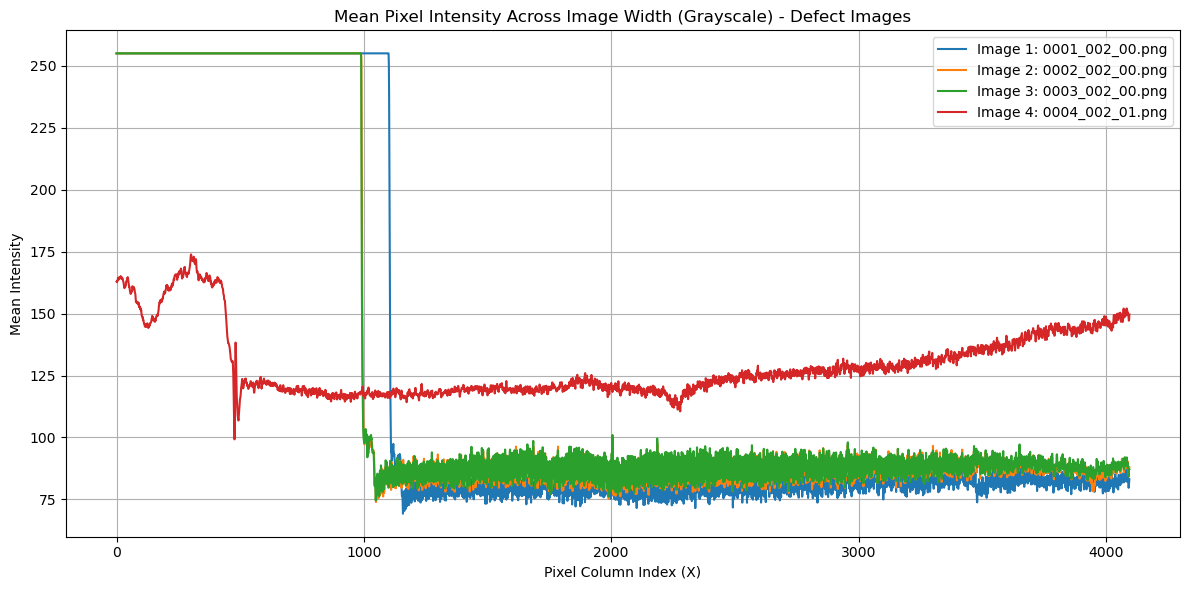

In [ ]:
# Configuration
folder_path = "./data/Defect_images"  # Adjust if needed
sample_files = sorted(os.listdir(folder_path))[:4]  # Pick first 3 normal images
image_paths = [os.path.join(folder_path, fname) for fname in sample_files]

# Plot setup
plt.figure(figsize=(12, 6))

for idx, img_path in enumerate(image_paths):
    # Load image as grayscale
    img = Image.open(img_path).convert("L")
    img_array = np.array(img)

    # Compute mean intensity per column (across height)
    column_means = img_array.mean(axis=0)

    # Plot
    plt.plot(column_means, label=f"Image {idx+1}: {os.path.basename(img_path)}")

plt.title("Mean Pixel Intensity Across Image Width (Grayscale) - Defect Images")
plt.xlabel("Pixel Column Index (X)")
plt.ylabel("Mean Intensity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---

## 6.🔚 Conclusion & Outlook

In this notebook, we introduced the **AITEX Fabric Defect Dataset**. A challenging, real-world collection of grayscale fabric images annotated with pixel-accurate defect masks. We explored its structure, the differences between image-based inputs and prior formats like time series or tabular data, and got our first visual impressions of how normal and defective fabrics differ in their statistical properties.

By understanding the dataset's format, complexity, and limitations, we're better equipped to prepare it for model training and evaluation.

---

### 🔍 Up Next: Data Preparation & Exploration

In the following notebook, we will **dive into data preparation and in-depth exploration**:

- Loading and visualizing image samples in bulk
- Converting full-width images into 256×256 patches
- Analyzing patch coverage, intensity distributions, and label availability
- Cleaning or transforming labels to match model input needs

This step is critical to ensure high-quality model performance and reproducibility in downstream tasks like training VAEs or segmentation-based models.

<p style="font-size: 0.8em; text-align: center;">© 2025 Oliver Grau. Educational content for personal use only. See LICENSE.txt for full terms and conditions.</p>